In [1]:
from qutip import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# Parameters
N = 10

gamma = 100
mag_f = np.array([1,1,1])
mag_fz = np.dot(mag_f,np.array([0,0,1]))
eps = np.pi

tau = 1/(gamma*mag_fz)

In [115]:
# Operators for qubit
sz = sigmaz()

# Hamiltonian
H = (eps/(4.0*tau))*(tensor(qeye(2),sz) + tensor(sz,qeye(2)) - tensor(sz,sz))

print(H)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[  78.53981634    0.            0.            0.        ]
 [   0.           78.53981634    0.            0.        ]
 [   0.            0.           78.53981634    0.        ]
 [   0.            0.            0.         -235.61944902]]


In [116]:
# Direction of any Vector
def direction(vector): 
    x, y, z = vector[0],vector[1],vector[2]
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z / r)
    return np.array([theta, phi])

print(direction(np.array([0,0,1])))

[0. 0.]


In [117]:
# Making a Qubit
def qubit(angle):
    up = ket("0")
    down = ket("1")
    a = np.cos(angle[0]/2.0)
    b = np.exp(1j*angle[1])*np.sin(angle[0]/2.0)
    qubit = a*up + b*down
    
    return qubit

print(qubit([np.pi/2.0,0]))

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]


In [118]:
q1_d = np.array([0, 0, -1]) #ket |1 >
q2_d = np.array([1, 0, 0]) #ket |1 >
qubit1 = qubit(direction(q1_d))
qubit2 = qubit(direction(q2_d))

In [119]:
# initial state: start with one of the qubits in its excited state
psi0 = tensor(qubit1, qubit2)
psi0

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.70710678]
 [0.70710678]]

In [120]:
t = 100
n = 500
tlist = np.linspace(0, t, n)
res = mesolve(H, psi0, tlist, [], [])
print(res)

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0


In [121]:
res.states[-1]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j]
 [0.71863487-1.00516136e-05j]
 [0.69476837+2.93401374e-02j]]

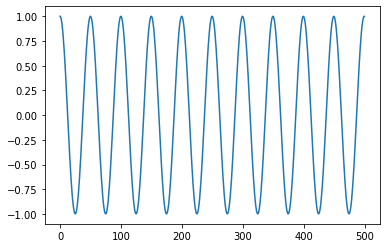

In [122]:
plt.plot(expect(tensor(qeye(2),sigmax()),res.states))

In [123]:
if (qubit1[1] == 0):   # ket |0>
    qubit_res = qubit2
    
else:                  # ket |1>
    qubit_res = Qobj(res.states[25][2:])

In [124]:
qubit_res

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.49956582+0.50114178j]
 [ 0.50324731-0.49601719j]]

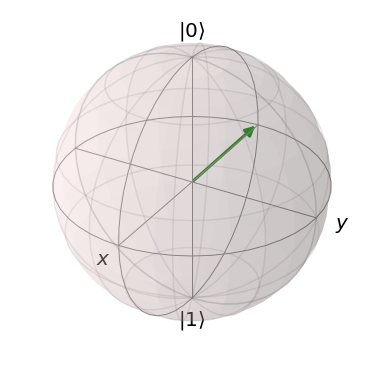

In [125]:
#Bloch Sphere 
bloch = Bloch()
bloch.add_states(qubit_res)
bloch.show()

In [8]:
t = 100
n = 500
tlist = np.linspace(0, t, n)
res = mesolve(H, psi0, tlist, [], [])
print(res)

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0


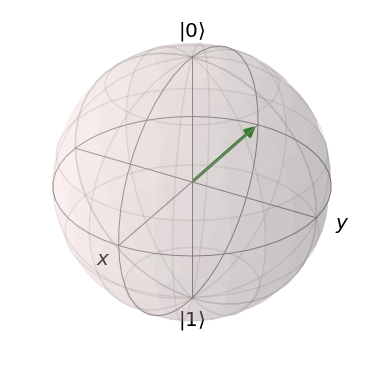

In [9]:
#Bloch Sphere 
bloch = Bloch()
bloch.add_states(res.states[50])
bloch.show()